<a href="https://colab.research.google.com/github/s-bhatia1216/esteelauder1b/blob/initial-frequentist-analysis/Initial_Frequentist_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Customer Purchase DataSet.xlsx to Customer Purchase DataSet.xlsx


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

### **Initial Model Analysis**

In [ ]:
# Load the data
df = pd.read_excel('Customer Purchase DataSet.xlsx')

# Add binary boolean treatment indictor at $80
df['Treatment'] = (df['Dollars Spent 2021'] >= 80).astype(int)

# Inspect first few rows of the dataframe with Treatment addition
print(df.head())

                            Customer ID  Dollars Spent 2021  \
0  9c7cdc4c-18fd-47ba-a304-a69fd69e4326           45.636204   
1  9e30f633-4dc3-4200-831c-a5dacc53ed13           40.311935   
2  342178ad-b68d-410d-a840-2d73624f9ba2           29.037670   
3  8f4657d9-a63a-4dfa-b429-d31cb3633d79           97.266983   
4  c18da3ee-7005-49da-abf0-8070170f3dc8           44.905178   

   Dollars Spent 2022  Treatment  
0           69.364189          0  
1           65.053696          0  
2           61.948933          0  
3          112.984993          1  
4           51.551075          0  


In [ ]:
# Define independent and dependent variables according to initial model specifications
X = df['Treatment']
y = df['Dollars Spent 2022']

X = sm.add_constant(X)

In [ ]:
# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Dollars Spent 2022   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                 2.790e+04
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:14:54   Log-Likelihood:                -90186.
No. Observations:               20000   AIC:                         1.804e+05
Df Residuals:                   19998   BIC:                         1.804e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.5704      0.167    326.464      0.0

## **Initial model OLS interpretations:**

### **Overall Model**
**R-squared: 0.582:**
*   The R-squared value indicates that 58.2% of the variation in Dollars Spent 2022 can be explained by the model, which includes the constant and treatment as predictors.
*   While 0.582 indicates a moderate to good fit, it also means that 41.8% of the variation remains unexplained.

### **Coefficients**
**Constant (Intercept) Coefficient:  54.5704:**
*   The coefficient value of the constant represents the predicted average 2022 dollar spending for customers who did not receive the treatment.

**Treatment Coefficient: 75.9865:**
*   The coefficient value represents the predicted average additional 2022 dollar spending for customers who did receive the treatment, compared to customers who did not receive the gift.
*   The model suggests that customers who received the surprise gift spent nearly $76 more on average than those who did not.


**const and Treatment P>|t|: 0.000:**
*  A P-value of 0.000 means the constant and treatment effects are statistically significant and have a meaningful impact on 2022 customer spending.

### **Residual Analysis**

**Omnibus: 4891.230:**
*  The Omnibus value gives insight based on skewness and kurtoisis(tailedness). The given large value paired with a small Prob(Omnibus) value of 0.000 indicates that the residuals significantly deviates from a normal distribution.

**Skew: 1.140:**
*  Measuring the asymmetry of the residuals, a skew value of 1.140 indicates that the residuals are positively skewed.

## **OLS Takeaways:**

*   The R-squared of 0.582 indicates that the model explains about 58.2% of the variance in spending, meaning that while the model is decent, there may be other variables that could further improve it.
*  The results of the residual analysis values suggest that the model's residuals are not normally distribuetd and that the model tends to under-predict high values of the dependant variable.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

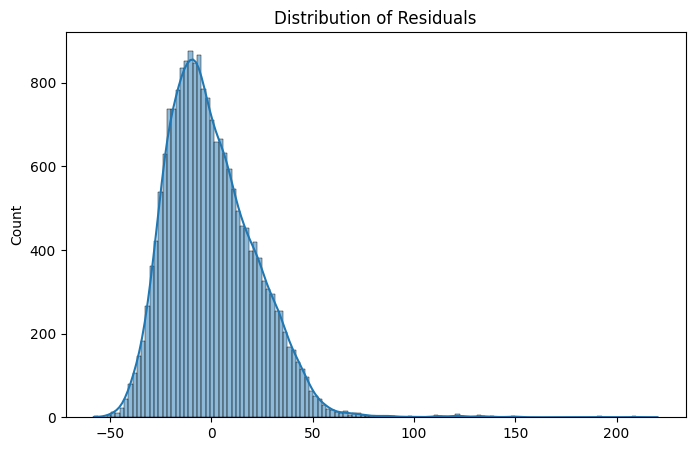

In [ ]:
# Checking residuals
y_pred = results.fittedvalues
residuals = df['Dollars Spent 2022'] - y_pred

# Distribution of residuals through a histogram
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

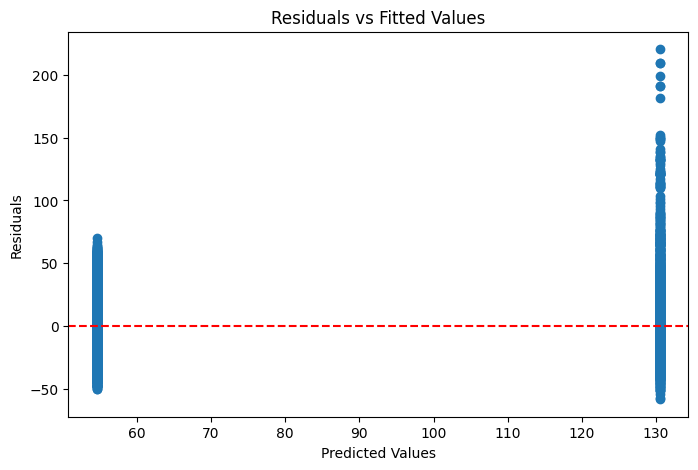

In [ ]:
# Residuals vs fitted values through a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

## **Initial Model Residual Graph Interpretations:**

**Distribution of Residuals Histogram**:
*   Slight visually apparent right skew, indicating that the model errors are not normally distributed over all predictions.
*   The long right tail suggests there are large underpredictions.

**Residuals vs Fitted Values Scatter Plot**
*   Residuals cluster heavily at the left (lower predicted values) and at the right (higher predicted values).
*   Visible outlier residuals at the higher predicted values.


## **Residual Analysis Takeaways:**

*   **Heteroscedasticity:** Refers to a situation where the variance of the errors (or residuals) is not constant across all levels of the independent variables.
  *   The heavy clustering seen in the scatter plot suggests the presence of heteroscedasticity since the variance of residuals is not constant across the range of predicted values.

## **Interaction Linear Regression Model Analysis**

In [ ]:
# Defining the interaction effect and integrating into the regression
df['Interaction'] = df['Dollars Spent 2021'] * df['Treatment']
X = df[['Dollars Spent 2021', 'Treatment', 'Interaction']]
X = sm.add_constant(X)

model_with_interaction = sm.OLS(df['Dollars Spent 2022'], X)
results_interaction = model_with_interaction.fit()
print(results_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:     Dollars Spent 2022   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 7.054e+04
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:24:46   Log-Likelihood:                -74425.
No. Observations:               20000   AIC:                         1.489e+05
Df Residuals:                   19996   BIC:                         1.489e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.8443      0

## **Interaction model OLS interpretations:**

### **Overall Model**
**R-squared: 0.914**:
*   The R-squared value indicates that 91.4% of the variation in Dollars Spent 2022 can be explained by the model, which includes the constant, 2021 spending, and treatment as predictors.
*   0.914 indicates a good fit, meaning that only 8.6% of the variation remains unexplained and that the model fits the data well.

### **Coefficients**
**Constant (Intercept) Coefficient:  9.8443**
*   The coefficient value of the constant represents the predicted average 2022 dollar spending for customers who's 2021 spending is $0 and did not receive the treatment.

**Dollars Spent 2021 Coefficient:  1.1017**
*   The coefficient value of 2021 spending represents the expected increase in dollar amount spent in 2022 for every additional $1 spent in 2021. For every additional \$1 spent in 2021, customers are expected to spend \$1.10 more in 2022.
*   The relationship shows that customers who already spent more in 2021 are likely to spend even more in 2022.

**Treatment Coefficient:  12.4675**
*   The coefficient value represents the predicted average additional 2022 dollar spending for customers who did receive the treatment, compared to customers that did not.
*   The model suggests that customers who received the surprise gift spent $12.46 more on average in 2022 than those who did not.

**Interaction Coefficient:  -0.1190**
*   The coefficient value represents how the effect of 2021 spending changes depending on the receiving of the treatment.
*   This negative interaction term suggests diminishing returns: the more a customer spends in 2021, the less impact the treatment (surprise gift) has on their spending in 2022.

**P>|t|: 0.000**:
*  A P-value of 0.000 for all effects means that they are statistically significant and have a meaningful effect on 2022 customer spending.

### **Residual Analysis**
**Omnibus: 2.531:**
*  The smaller Omnibus value, combined with the Prob(Omnibus) value of 0.282, indicates that the residuals are not significantly different from a normal distribution. This suggests that the model meets the assumption of normality.

**Skew: 0.013:**
*  The skew value is very close to zero, indicating that the residuals are symmetrically distributed around zero.

## **OLS Takeaways:**

*   The R-squared of 0.914 is a significant improvement over the initial model's R-squared of 0.582.
*   The R-squared value indicates that including the interaction effects greatly enhances the model's explanatory power.
*   The Omnibus and Skew values show significant improvements, confirming that the residuals are normally distributed and symmetrically centered around zero.

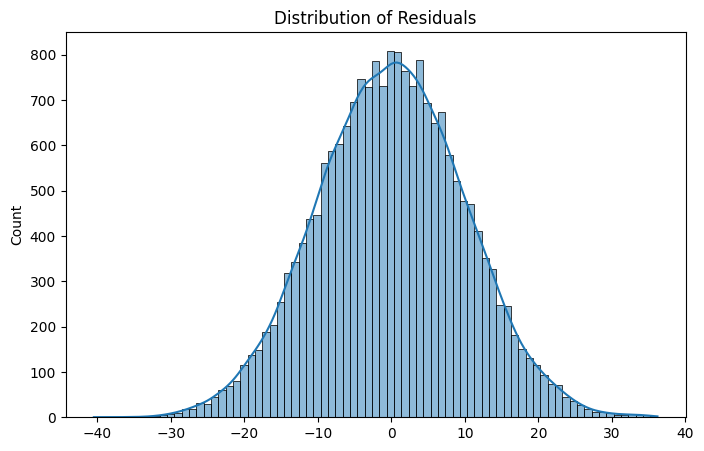

In [ ]:
# Checking residuals for model with interaction effects
y_pred_interaction = results_interaction.fittedvalues
residuals_interaction = df['Dollars Spent 2022'] - y_pred_interaction

plt.figure(figsize=(8, 5))
sns.histplot(residuals_interaction, kde=True)
plt.title('Distribution of Residuals')
plt.show()

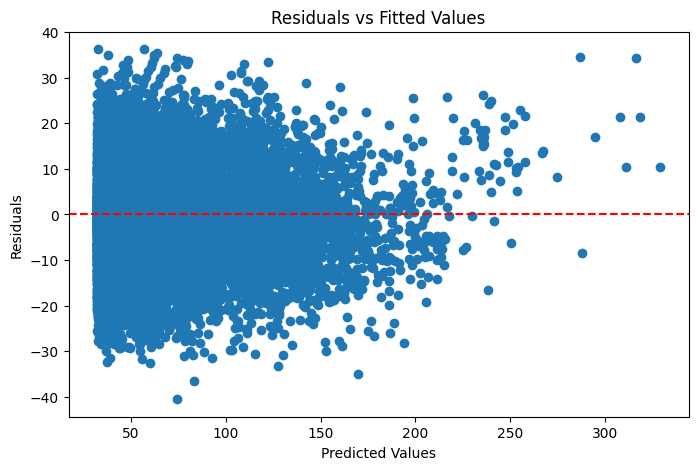

In [ ]:
# Residuals vs fitted values through a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_interaction, residuals_interaction)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

## **Interaction Model Residual Graph Interpretations:**

**Distribution of Residuals Histogram**:
*   Matches the ideal case:
  *   Symmetrically distributed around zero, indicating that the model's errors are spread evenly across predictions.
  *   Following a normal distribution (bell-shaped) curve, which means the model is meeting normality.

**Residuals vs Fitted Values Scatter Plot**
*   Matches ideal case:
  *   Randomly scattered around zero with no clear pattern, indicating that the model is capturing the variable relationships and the residuals are independent of predicted values.


## **Interaction Residual Graph Analysis Takeaways:**

*   Unlike the initial model, where there was some evidence of heteroscedasticity, the interaction model does not display these issues.
*   The residual graphs have ideal properties for a regression model. Constant variance (no heteroscedasticity), normally distributed residuals, and independent errors ensure that the model captures the key relationships in the data and that its predictions are accurate.


## **Interaction Model Bathwidth Selection Analysis**

to-do:
  - integrate banwith into model
  - 20$ is a great place to be
  - Goal: maintain good amount of customers, push up on the bandwidth as much as possible, keeping treatment effect down
  - suggested format to test around 20\$:
    - for loop, incrementing 5$. start at 5$, go up to 50$?
  - visualize data in different ways, looking for a point of inflection
  - create graph visual given by drawing -> ss in the report!